In [206]:
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, UpSampling2D, AveragePooling2D

import numpy as np
import matplotlib
from matplotlib import pyplot
from IPython.display import clear_output

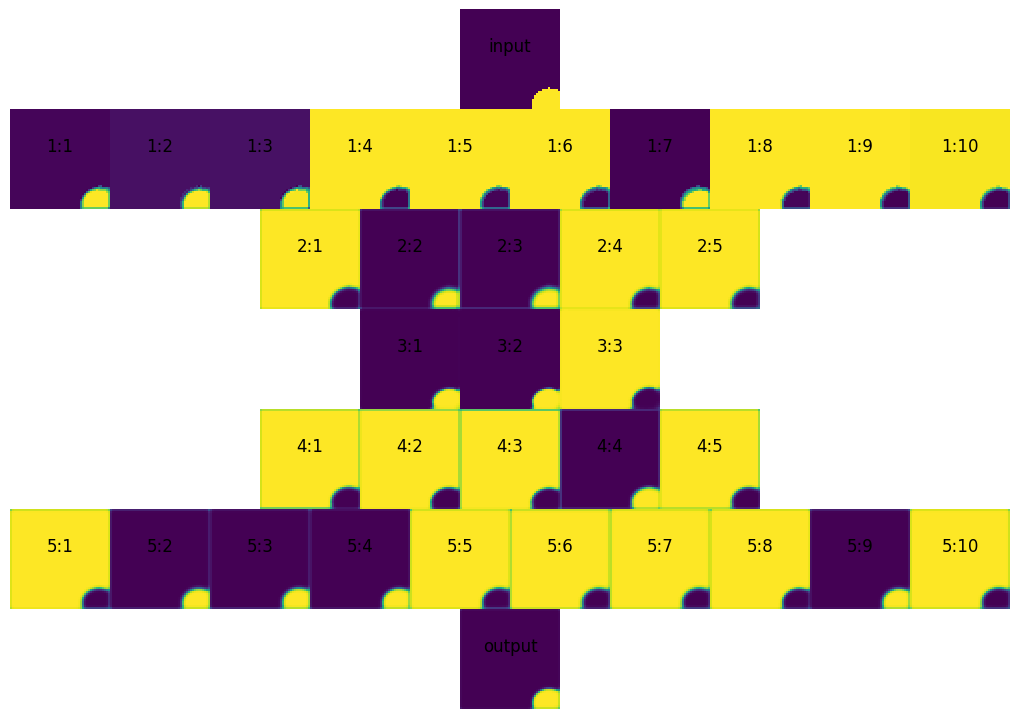

In [218]:
#function generating a randomly positiones circle of random radius
def rand_circ(Nbatch,res):
    points=np.linspace(-1,1,res)
    x1,x2=np.meshgrid(points,points)
    r=np.random.uniform(0.25,1,Nbatch)
    x1_0=np.random.uniform(-1,1,Nbatch)
    x2_0=np.random.uniform(-1,1,Nbatch)
    vals=1.0*((x1[None,:,:]-x1_0[:,None,None])**2+(x2[None,:,:]-x2_0[:,None,None])**2<r[:,None,None]**2) #None - axis expand
    
    return vals

def figure_data_extract(data,res):
    Nrows=len(data)
    Ncols=[len(data[i][0,0,0]) for i in range(Nrows)]
    result=[[np.zeros((res,res)) for j in range(Ncols[i])] for i in range(Nrows)]
    for i in range(Nrows):
        for j in range(Ncols[i]):
            result[i][j][0:len(data[i][0]),0:len(data[i][0,0])]=data[i][0,:,:,j]
    return result

#function generating plot visualizing all channels in all layers in NN
def print_network(input,imgs,res):
    points=np.linspace(-1,1,res)
    x,y=np.meshgrid(points,points)
    Nrows=len(imgs)
    Ncols=[len(imgs[n]) for n in range(Nrows)]
    Nmax=max(Ncols)
    fig=pyplot.figure(figsize=(Nmax,Nrows+1))
    #plot=fig.add_gridspec(Nrows,Nmax)
    #plt=plot.subplots()
    plt=[[0 for j in range(Ncols[i])] for i in range(Nrows)]
    for n in range(Nrows):
        for k in range(Ncols[n]):
            plt[n][k]=fig.add_axes([((Nmax-Ncols[n])/2+k)/Nmax,(Nrows-1-n)/(Nrows+1),1.0/Nmax,1.0/(Nrows+1)])
            plt[n][k].pcolormesh(x,y,imgs[n][k])
            plt[n][k].axis('off')
            if n!=Nrows-1:
                plt[n][k].set_title(f"{n+1:}:{k+1:}",x=0.5,y=0.5)
            else:
                plt[n][k].set_title("output",x=0.5,y=0.5)
    plt_in=fig.add_axes([(Nmax-1)/2/Nmax,Nrows/(Nrows+1),1.0/Nmax,1.0/(Nrows+1)])
    plt_in.pcolormesh(x,y,input)
    plt_in.set_title("input",x=0.5,y=0.5)
    plt_in.axis('off')
    pyplot.show()

#auto-encoder NN
network=Sequential()
network.add(Conv2D(10,3,input_shape=(None,None,1),activation='sigmoid',padding='same'))
#network.add(AveragePooling2D(pool_size=(5,5),padding='same'))
network.add(Conv2D(5,3,input_shape=(None,None,1),activation='sigmoid',padding='same'))
#network.add(AveragePooling2D(pool_size=(2,2),padding='same')) #causes problems, but why?
network.add(Conv2D(3,10,activation='sigmoid',padding='same'))
#network.add(UpSampling2D(size=(2,2)))
network.add(Conv2D(5,3,input_shape=(None,None,1),activation='sigmoid',padding='same'))
#network.add(UpSampling2D(size=(5,5)))
network.add(Conv2D(10,3,input_shape=(None,None,1),activation='sigmoid',padding='same'))
network.add(Conv2D(1,1,activation='sigmoid',padding='same'))
network.compile(loss='mean_squared_error',optimizer='adam')

#training of the auto-encoder to reproduce its input image
def teach_network(model,generator,Nsteps,Nbatch,res,vis=False):

    cost=[0]*Nsteps
    test_img=np.zeros([1,res,res,1])
    test_img[:,:,:,0]=generator(1,res)
    
    img_in=np.zeros([Nbatch,res,res,1])
    
    for it in range(Nsteps):
        img_in[:,:,:,0]=generator(Nbatch,res)
        img_out=np.copy(img_in)#img_in.copy()
        cost[it]=model.train_on_batch(img_in,img_out)
        print(f"{it/Nsteps:.0%} cost={cost[it]:}",end="                  \r")
        if vis==True and it%int(0.1*Nsteps)==0:
            clear_output(wait=True)
            extractor=Model(inputs=model.inputs,outputs=[layer.output for layer in model.layers])
            dataNN=extractor(test_img)
            imgs=figure_data_extract(dataNN,res)
            print_network(test_img[0,:,:,0],imgs,res)
            
"""
    if vis==False:
        result_img=model.predict_on_batch(test_img)
        fig=pyplot.figure(figsize=(8,4))
        plot=fig.add_gridspec(1,2)
        plt=plot.subplots()
        #plt[0].pcolormesh(x,y,test_img[0,:,:,0])
        #plt[1].pcolormesh(x,y,result_img[0,:,:,0])
        pyplot.show()
"""
teach_network(network,rand_circ,600,50,50,True)


(50, 50) (50, 50)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(1, 50, 50, 4)


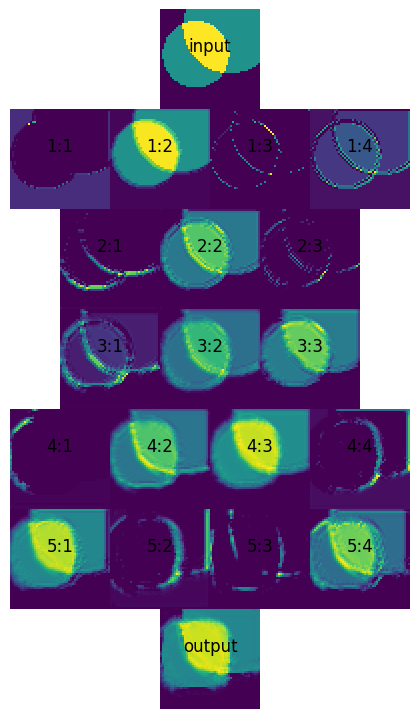

In [325]:
#this cell uses some function from the next cell, please see for reference...
extractor=Model(inputs=network2.inputs,outputs=[layer.output for layer in network2.layers])
test_data=rand_square(1,50)
test_circ,test_square=circ_square_data(1,50)
print(np.shape(test_data[0]),np.shape(test_circ[0]))
print(type(test_data),type(test_circ))
test_data=test_circ
print(np.shape(extractor(test_data)[0]))
test=np.zeros((50,50))
tmp=extractor(test_data)[0][0,:,:,0]
test[0:50,0:50]=tmp[:,:]
img_data=extractor(test_data)
imgs=figure_data_extract(img_data,50)
print_network(test_data[0],imgs,50)

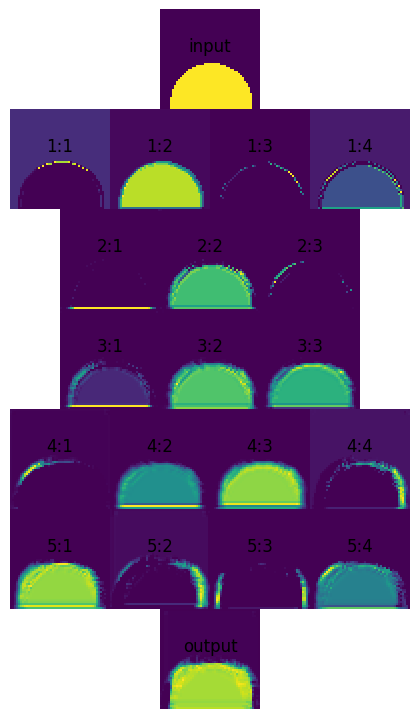

In [322]:
#here NN is trained to turn image of random circles into random squares

def rand_square(Nbatch,res):
    points=np.linspace(-1,1,res)
    x1,x2=np.meshgrid(points,points)
    r=np.random.uniform(0.25,1,Nbatch)
    x1_0=np.random.uniform(-1,1,Nbatch)
    x2_0=np.random.uniform(-1,1,Nbatch)
    vals=1.0*((x1[None,:,:]-x1_0[:,None,None])<r[:,None,None])*(-r[:,None,None]<(x1[None,:,:]-x1_0[:,None,None]))*(-r[:,None,None]<(x2[None,:,:]-x2_0[:,None,None]))*((x2[None,:,:]-x2_0[:,None,None])<r[:,None,None]) #None - axis expand
    return vals

#function generating a batch of image pairs, where one are random circles (random number of cirlces, sizes and positions) and the corresponding squares
def circ_square_data(Nbatch,res):
    nums=np.random.randint(1,4,Nbatch)
    Ntot=nums.sum()
    points=np.linspace(-1,1,res)
    x1,x2=np.meshgrid(points,points)
    r=np.random.uniform(0.25,1,Ntot)
    x1_0=np.random.uniform(-1,1,Ntot)
    x2_0=np.random.uniform(-1,1,Ntot)
    sqrs=1.0*((x1[None,:,:]-x1_0[:,None,None])<r[:,None,None])*(-r[:,None,None]<(x1[None,:,:]-x1_0[:,None,None]))*(-r[:,None,None]<(x2[None,:,:]-x2_0[:,None,None]))*((x2[None,:,:]-x2_0[:,None,None])<r[:,None,None]) #None - axis expand
    circs=1.0*((x1[None,:,:]-x1_0[:,None,None])**2+(x2[None,:,:]-x2_0[:,None,None])**2<r[:,None,None]**2) #None - axis expand
    vals_c=np.zeros((Nbatch,res,res))
    vals_s=np.zeros((Nbatch,res,res))
    start=0
    k=0
    for n in nums:
        vals_c[k]=sum(circs[start:(start+n)])
        vals_s[k]=sum(sqrs[start:(start+n)])
        start+=n
        k+=1
    return vals_c,vals_s

#NN definition

network2=Sequential()
network2.add(Conv2D(4,3,input_shape=(None,None,1),activation='relu',padding='same'))
#network.add(AveragePooling2D(pool_size=(5,5),padding='same'))
network2.add(Conv2D(3,3,input_shape=(None,None,1),activation='relu',padding='same'))
#network.add(AveragePooling2D(pool_size=(2,2),padding='same')) #causes problems, but why?
network2.add(Conv2D(3,3,activation='relu',padding='same'))
#network.add(UpSampling2D(size=(2,2)))
network2.add(Conv2D(4,3,input_shape=(None,None,1),activation='relu',padding='same'))
#network.add(UpSampling2D(size=(5,5)))
network2.add(Conv2D(4,3,input_shape=(None,None,1),activation='relu',padding='same'))
network2.add(Conv2D(1,1,activation='relu',padding='same'))
network2.compile(loss='mean_squared_error',optimizer='adam')

#NN teaching function
def teach_network2(model,generator,Nsteps,Nbatch,res,vis=False):

    cost=[0]*Nsteps
    test_img_in=np.zeros([1,res,res,1])
    test_img_out=np.zeros([1,res,res,1])
    test_img_in[:,:,:,0],test_img_out[:,:,:,0]=generator(1,res)
    
    img_in=np.zeros([Nbatch,res,res,1])
    img_out=np.zeros([Nbatch,res,res,1])
    
    for it in range(Nsteps):
        img_in[:,:,:,0],img_out[:,:,:,0]=generator(Nbatch,res)
        cost[it]=model.train_on_batch(img_in,img_out)
        print(f"{it/Nsteps:.0%} cost={cost[it]:}",end="                  \r")
        if vis==True and it%int(0.1*Nsteps)==0:
            clear_output(wait=True)
            extractor=Model(inputs=model.inputs,outputs=[layer.output for layer in model.layers])
            dataNN=extractor(test_img_in)
            imgs=figure_data_extract(dataNN,res)
            print_network(test_img_in[0,:,:,0],imgs,res)

teach_network2(network2,circ_square_data,20000,50,50,vis=True)

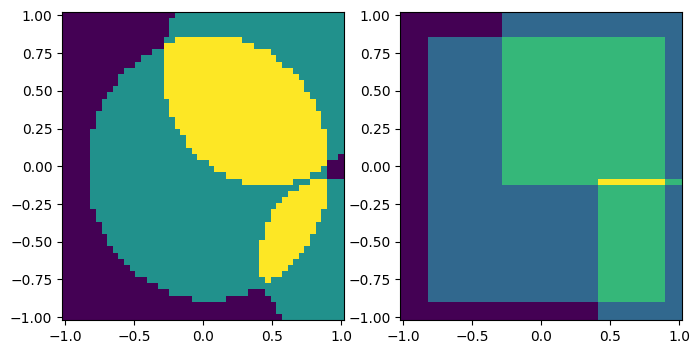

In [302]:
#plotting output of function generating circles and squares
points=np.linspace(-1,1,50)
x,y=np.meshgrid(points,points)
test_in,test_out=circ_square_data(1,50)
fig=pyplot.figure(figsize=(8,4))
plot=fig.add_gridspec(1,2)
plt=plot.subplots()
plt[0].pcolormesh(x,y,test_in[0])
#plt[0].box_ratio(1)
plt[1].pcolormesh(x,y,test_out[0])
#plt[1].box_ratio(1)
pyplot.show()